# b) Regression

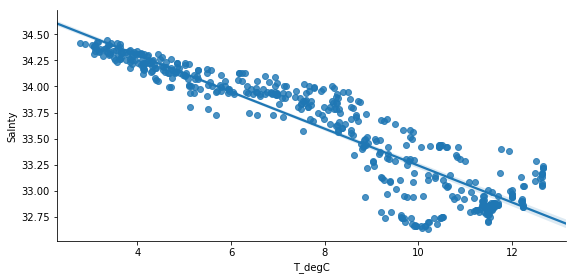

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

path = "C:\\Users\\Talal\\School\\CSC 177\\Labs\\Lab 2\\"
filename = 'bottle.csv'

filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])

df = df.dropna()

def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

# visualize the relationship
sb.pairplot(df, x_vars='T_degC', y_vars='Salnty', height=4, aspect=2, kind='reg')

Root mean squared error = 0.1250
R-squared = 0.8442


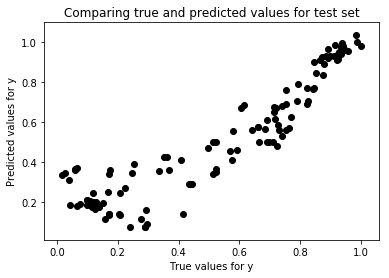

In [11]:
# Linear Regression
normalize_numeric_minmax(df, 'T_degC')
normalize_numeric_minmax(df, 'Salnty')
X = df[['T_degC']]
y = df[['Salnty']]
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred_test = regr.predict(x_test)

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))



## Multiple Linear Regression

Slope =  -0.95964134
Intercept =  1.0339228


Text(0, 0.5, 'y')

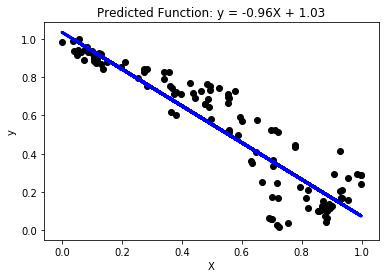

In [12]:
#Multiple Linear Regression
#Continues from Linear Regression

print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0]) ### Step 4: Postprocessing

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

In [13]:
seed = 1
np.random.seed(seed)
X2 = 0.5*X + np.random.normal(0, 0.04, size=numInstances).reshape(-1,1)
X3 = 0.5*X2 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X4 = 0.5*X3 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X5 = 0.5*X4 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Correlation between X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Correlation between X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Correlation between X4 and X5 = %.4f' % (c[0,1])
ax4.set_title(titlestr)

ValueError: Unable to coerce to DataFrame, shape must be (484, 1): given (500, 1)